## Training of a classification model for predicting alzheimer's disease om kaggle dataset

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.cm as cm
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, datasets

from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import preprocessing

from sklearn.feature_selection\
    import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


import pandas as pd
import csv
from multiprocessing import Process

from os.path import exists

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from tests import feat_sel_col_test

#### Specify path to data


In [2]:
#specify path to file - colab
## Connect Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

main_path = "/content/gdrive/MyDrive/Thesis/kaggle"
data_path = f"{main_path}/tabular_classification/data"

Mounted at /content/gdrive


In [3]:
#specify path to data local PC
#data_path = "/tabular_classification/data"

In [4]:
#read dataset into a pandas dataframe      oasis_cross-sectional
#df = pd.read_csv(f"{path}oasis_cross-sectional.csv")
df = pd.read_csv(f"{data_path}/oasis_longitudinal.csv")
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### 2. Data Understanding

#### 2.1 Describing dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [7]:
#describing dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### 2.2 Exploring dataset
#### This dataset will be explored by making a plot of each individual features of the dataset to identify their individual distribution


In [38]:
#Function for plotting bar, pie, and other charts
def plot_dist(df, col_name, color):
    """
    Function for plotting based on column name
    Input parameters:-
    df = dataframe
    col_name = column name
    color = type of plot (pie, box, bar)"""

    cmap = cm.get_cmap('RdYlGn')


    image =  df[col_name].value_counts().plot(kind=color, colormap = cmap)
    sns.distplot(df[col_name].value_counts())
    image.figure.savefig(f"{data_path}/{col_name}.jpg")

    return image

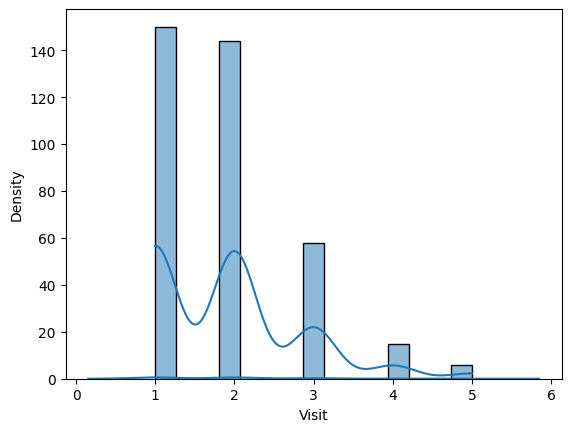

Mean of Visit: 1.8820375335120643, Variance of Visit: 0.851638848049814, Standard Deviation of Visit: 0.9228428078767337



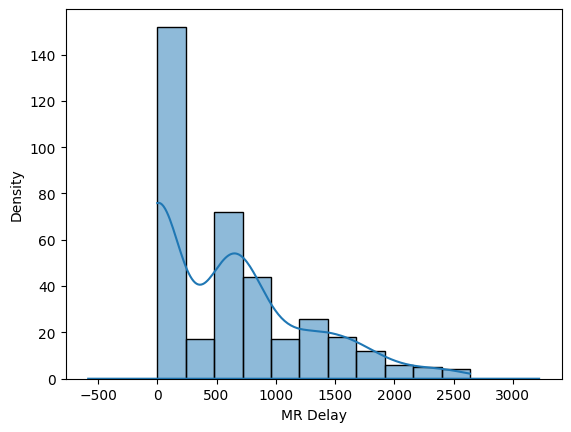

Mean of MR Delay: 595.1045576407507, Variance of MR Delay: 403841.3358125054, Standard Deviation of MR Delay: 635.4851184823334



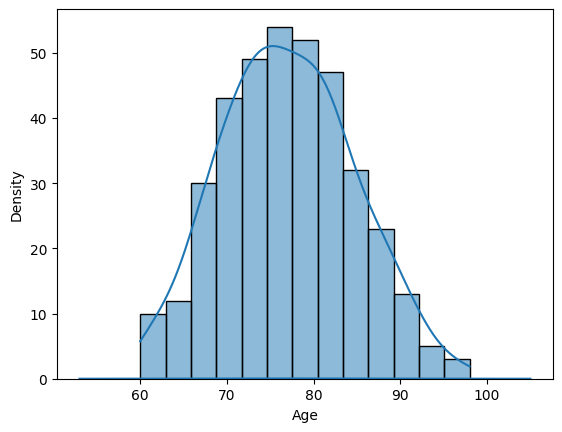

Mean of Age: 77.01340482573727, Variance of Age: 58.3842284297616, Standard Deviation of Age: 7.640957297993596



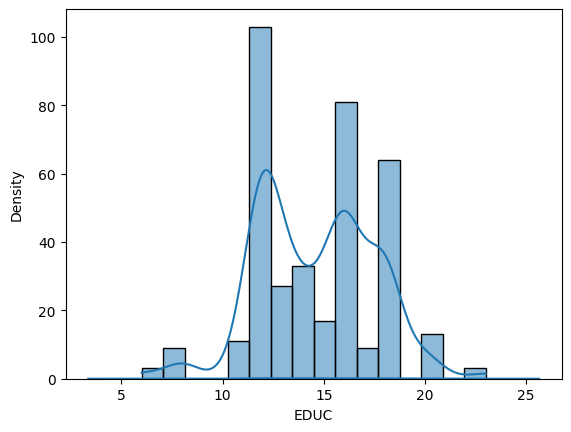

Mean of EDUC: 14.597855227882038, Variance of EDUC: 8.273328720920176, Standard Deviation of EDUC: 2.8763394655221375



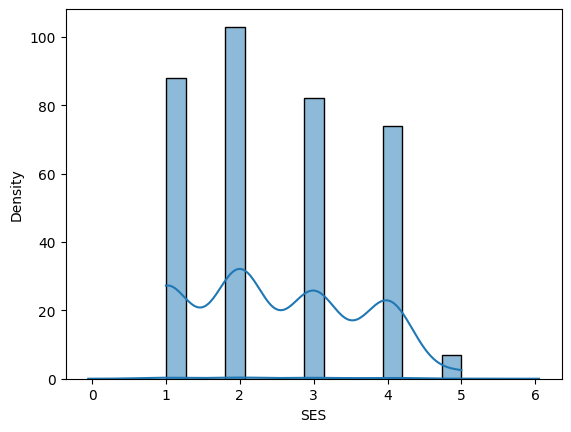

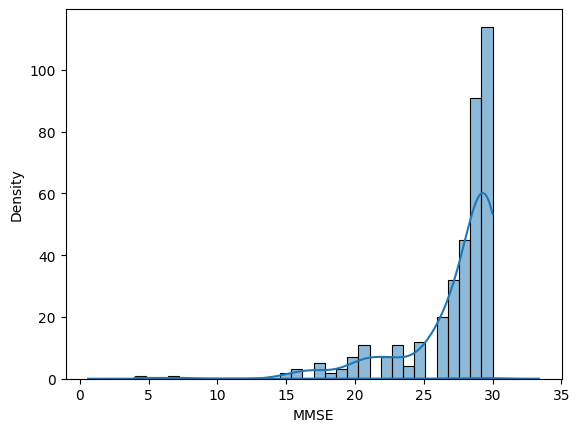

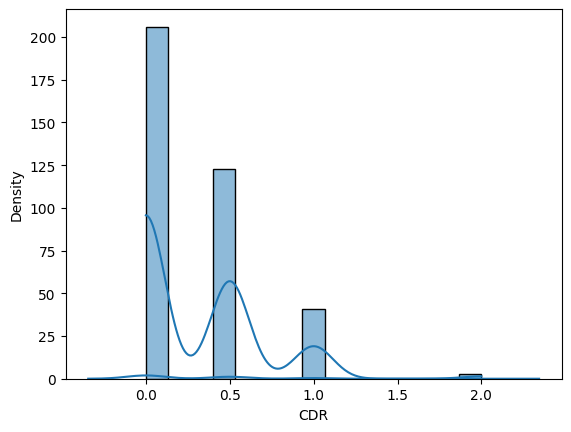

Mean of CDR: 0.29088471849865954, Variance of CDR: 0.14029303237337484, Standard Deviation of CDR: 0.3745571149682981



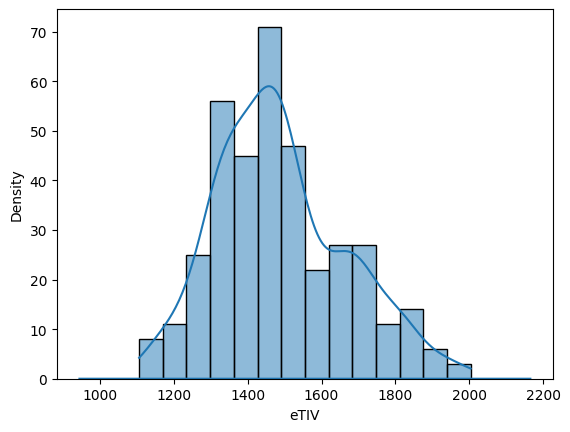

Mean of eTIV: 1488.1286863270777, Variance of eTIV: 31025.047911441667, Standard Deviation of eTIV: 176.13928554255483



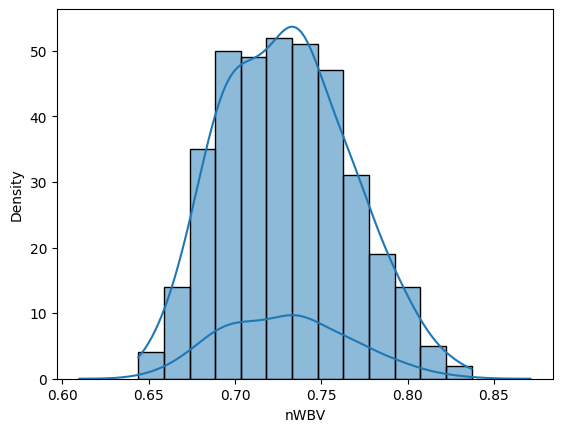

Mean of nWBV: 0.7295683646112601, Variance of nWBV: 0.0013790094266193898, Standard Deviation of nWBV: 0.0371350161790646



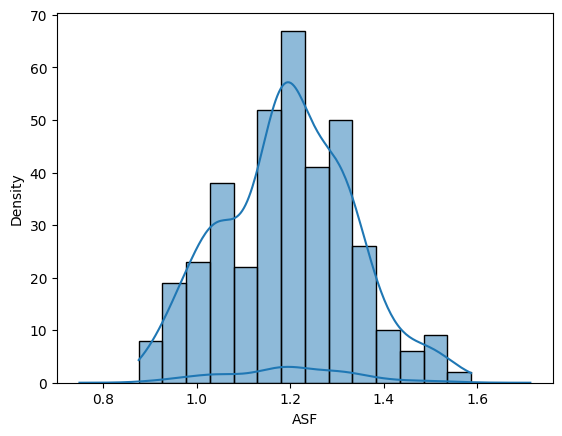

Mean of ASF: 1.195461126005362, Variance of ASF: 0.019069388941739457, Standard Deviation of ASF: 0.1380919582804859

Total number of numeric or float variables are 8


In [9]:
from sklearn.metrics.pairwise import parse_version
plt.figure()

count = 0
for cols in df.columns:

    datatype = df[cols].dtype  #get column datatype
    if datatype == "int64" or datatype == "float64":   #plot histogram if create a plot
        sns.kdeplot(data=df, x=cols)
        sns.histplot(df, x=cols, kde=True)
        #plt.savefig(f"{cols}.png")
        plt.show()

        #print(f"Pictures/{names[i]}.png")
        mean = statistics.mean(df[cols])
        try:
          var = statistics.variance(df[cols])
          std = statistics.stdev(df[cols])
          print(f"Mean of {cols}: {mean}, Variance of {cols}: {var}, Standard Deviation of {cols}: {std}")
          print()
          count += 1
        except ValueError:
          pass
print(f"Total number of numeric or float variables are {count}")

<ipython-input-8-249e510793ad>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')
<ipython-input-8-249e510793ad>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name].value_counts())


<Axes: xlabel='Group', ylabel='Density'>

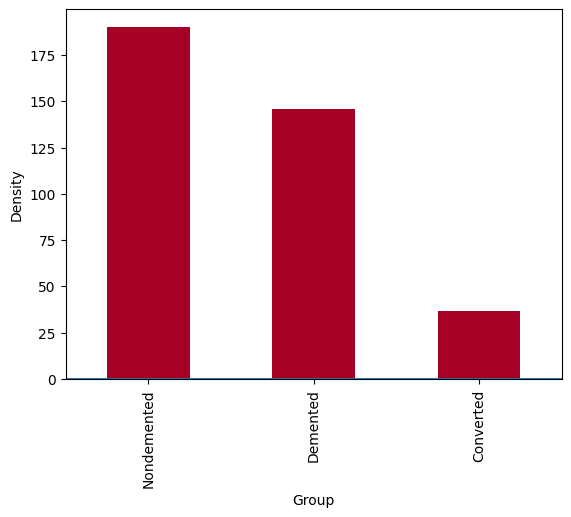

In [10]:
#plot bar chart for leabel variable = diagnosis
plot_dist(df, "Group", 'bar')

In [11]:
#check percentage of malignant and benign categories
count_nd = len(df[df['Group'] == 'Nondemented'])
count_d = len(df[df['Group'] == 'Demented'])
count_c = len(df[df['Group'] == 'Converted'])
pct_of_nd = count_nd/(count_nd + count_d + count_c)
print("percentage of non-demented group is", pct_of_nd*100)
pct_of_d = count_d/(count_nd + count_d + count_c)
print("percentage of demented group is", pct_of_d*100)
pct_of_c = count_c/(count_nd + count_d + count_c)
print("percentage of demented group is", pct_of_c*100)

percentage of non-demented group is 50.93833780160858
percentage of demented group is 39.14209115281501
percentage of demented group is 9.919571045576408


In [12]:
#Insights
#mean of variables of malignant tumor are higher than those of benign
df.groupby('Group').mean()

<ipython-input-12-d49b5ccf9c39>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Group').mean()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,,,,,,,,,,
Converted,2.027027,771.810811,79.756757,15.459459,1.729730,28.675676,0.256757,1459.270270,0.723730,1.212405
Demented,1.732877,452.541096,76.260274,13.671233,2.771654,24.513889,0.671233,1485.849315,0.716301,1.196890
Nondemented,1.968421,670.242105,77.057895,15.142105,2.394737,29.226316,0.005263,1495.500000,0.740900,1.191063


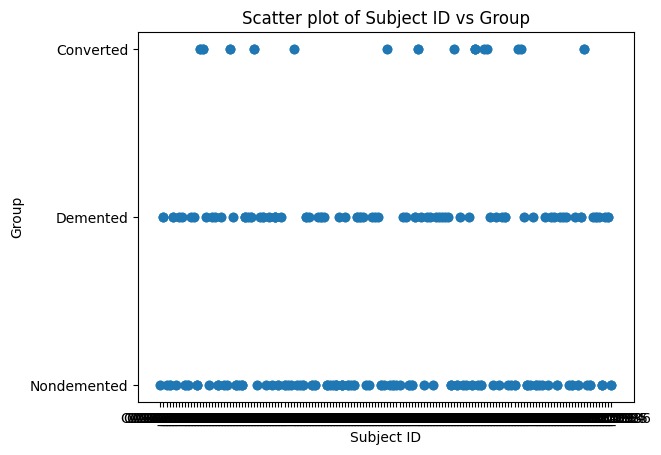

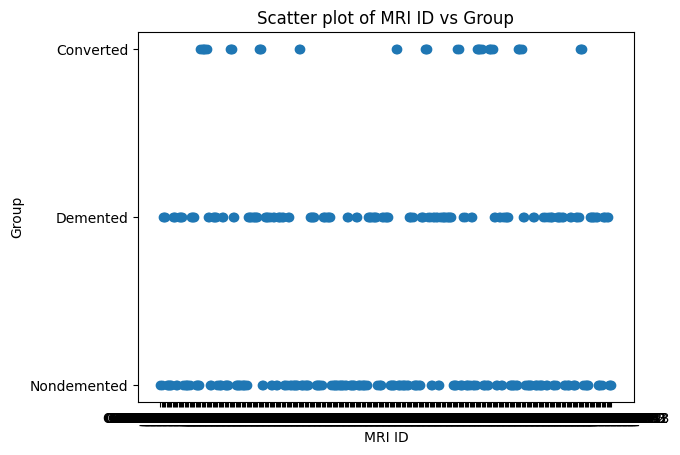

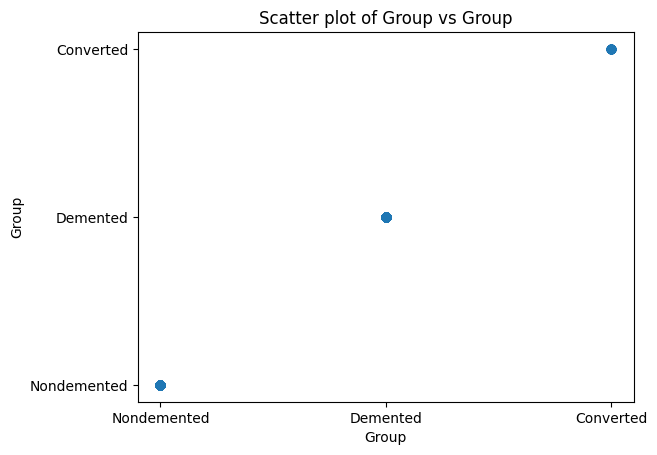

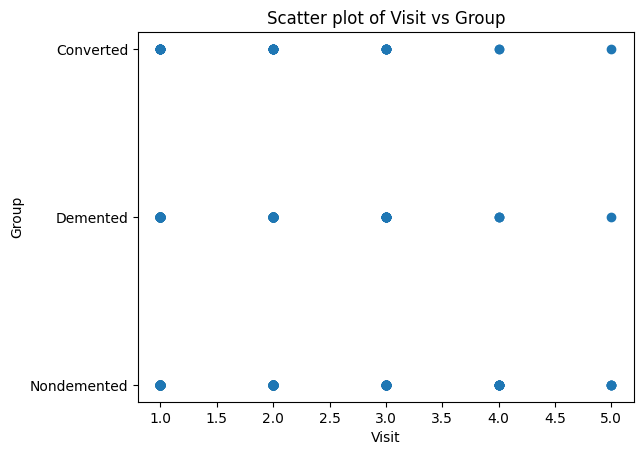

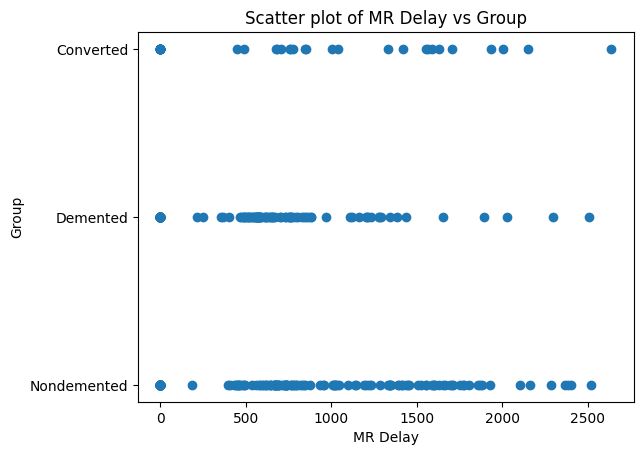

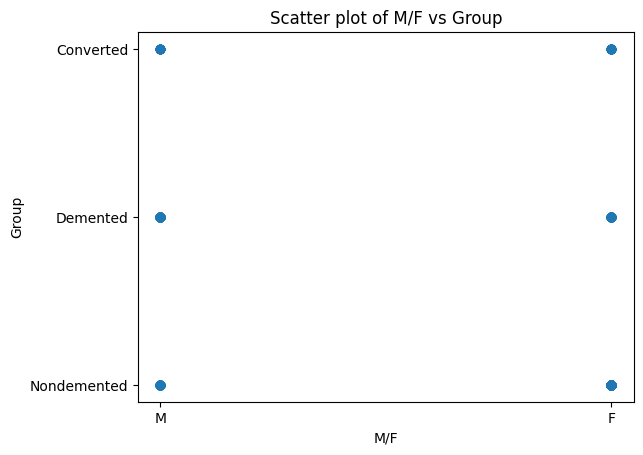

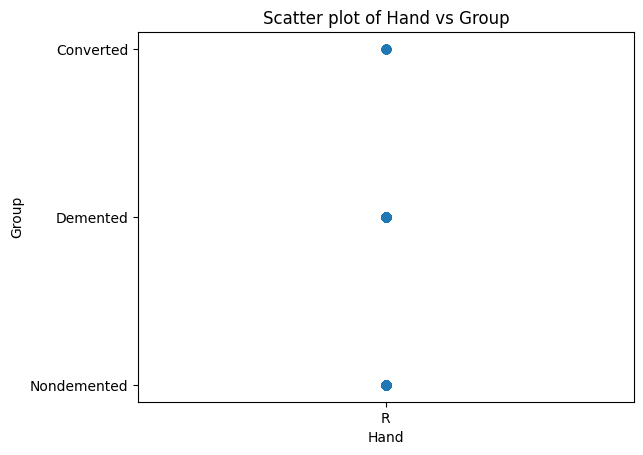

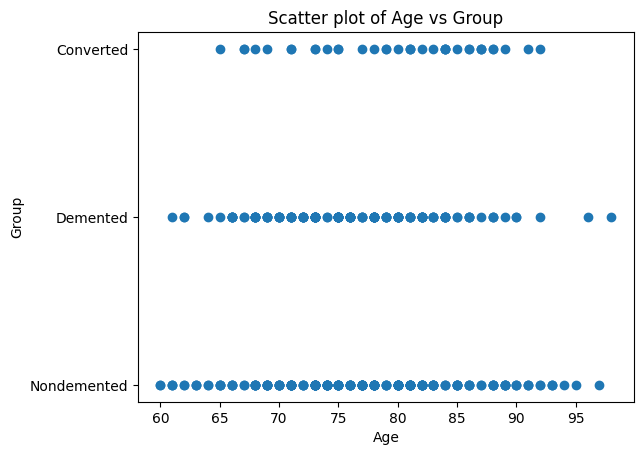

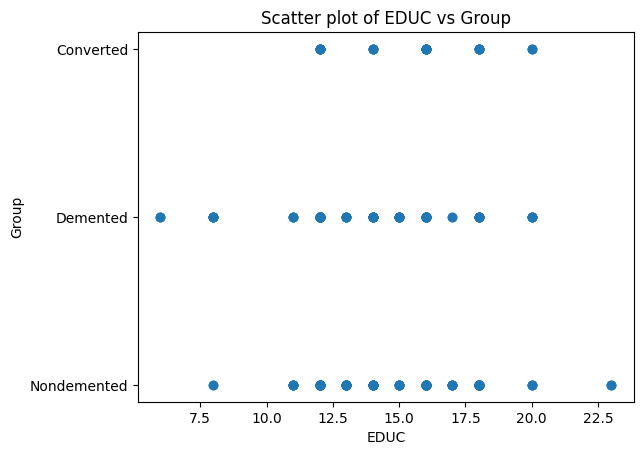

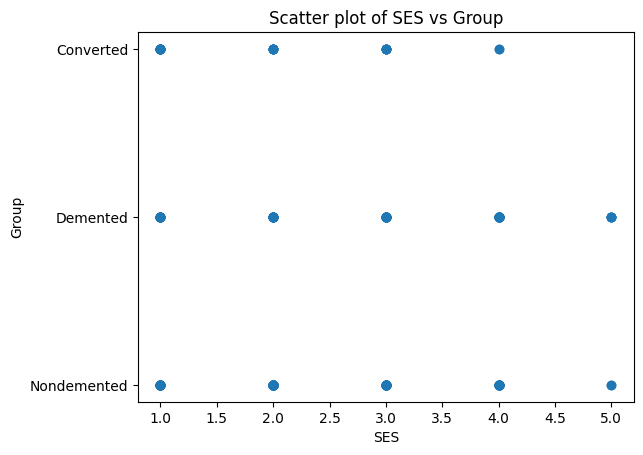

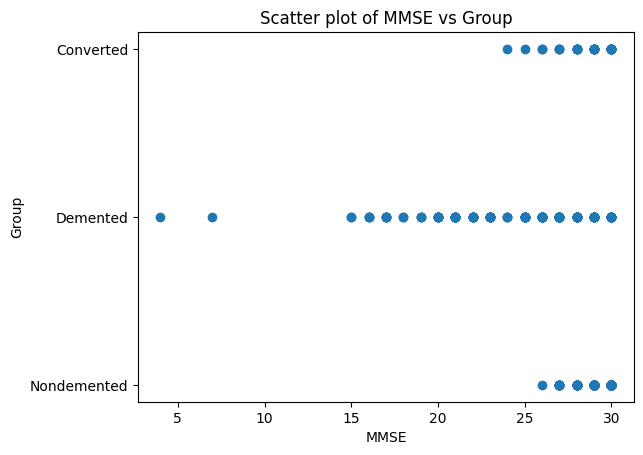

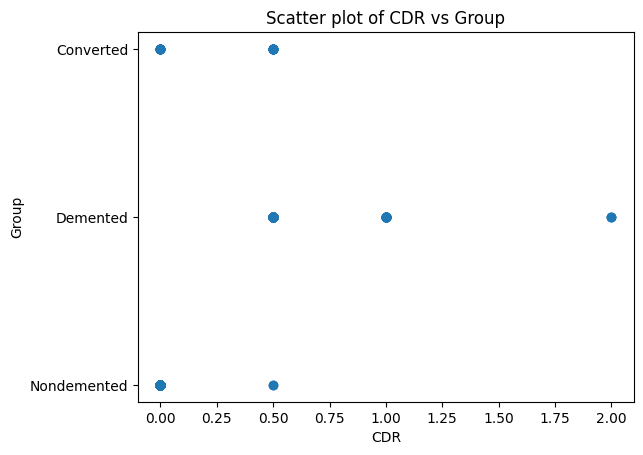

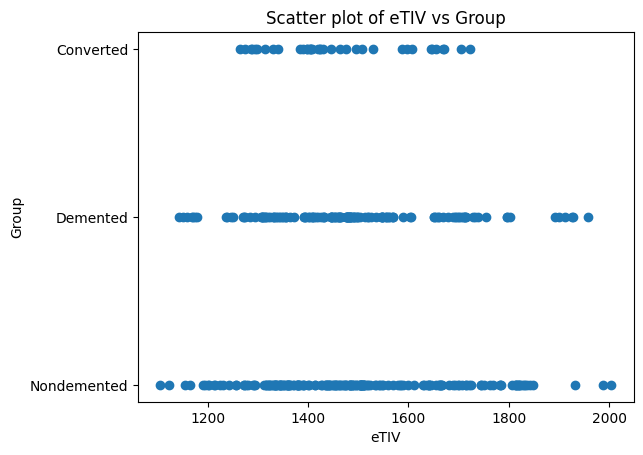

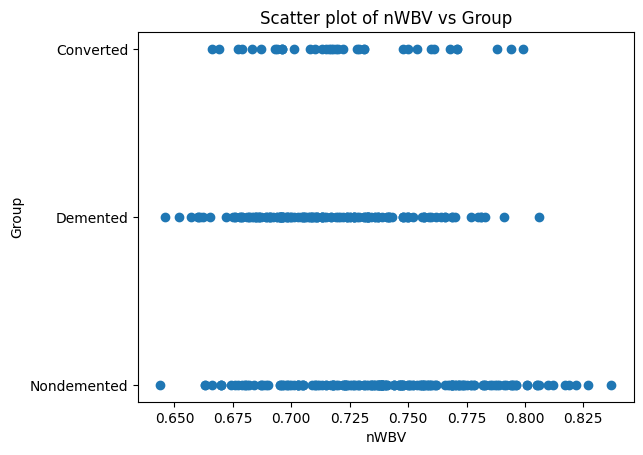

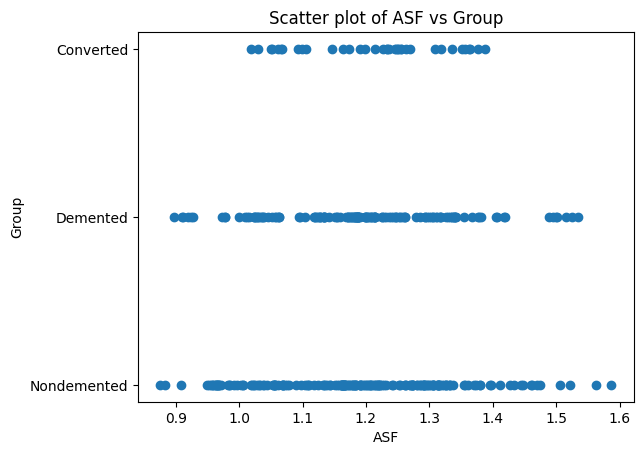

In [13]:
#check relationship between other features and diagnosis
plt.figure()


for col in df.columns:


    #col = 'radius_mean'
    #table = pd.crosstab(df[col] ,df['diagnosis'])
    #table.div(table.sum(1).astype(float), axis=0).plot(kind="scatter")
    plt.scatter(df[col] ,df['Group'])
    plt.title(f'Scatter plot of {col} vs Group')
    plt.xlabel(f'{col}')
    plt.ylabel('Group')
    plt.show()
    #plt.savefig(f'{col}_vs_diagnosis')

<ipython-input-14-717dba7e0a82>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ndf.corr(), annot=True)


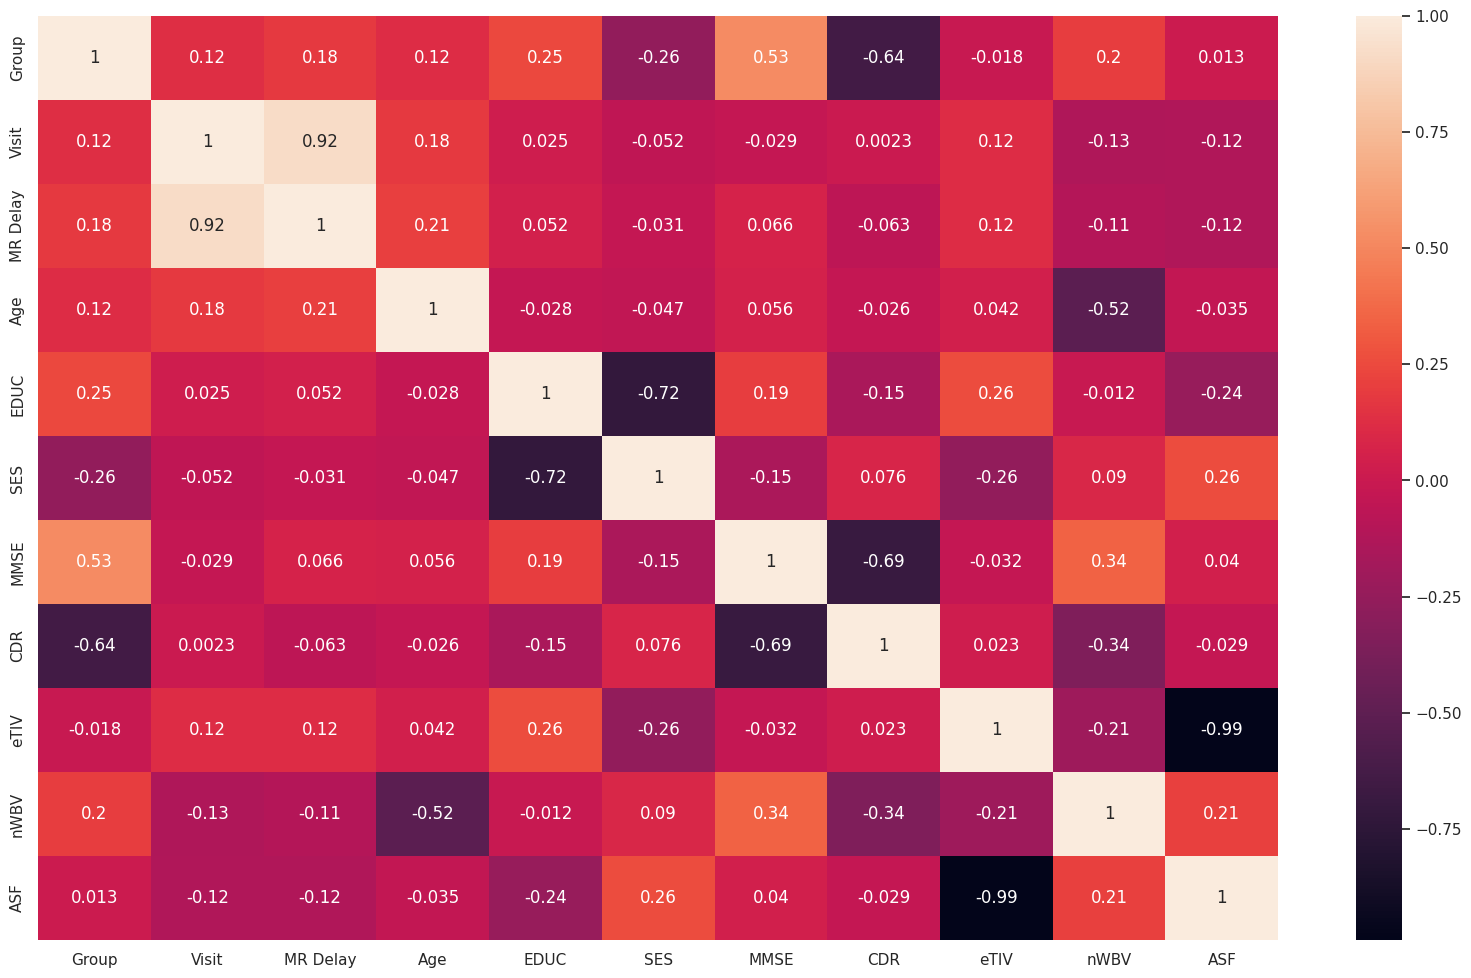

In [14]:
#check correlation using corellation heatmap
ndf = df.copy()
#change diagnosis to 1 and 0
ndf['Group'].replace(to_replace='Nondemented', value = 1, inplace=True)
ndf['Group'].replace(to_replace='Demented', value = 0, inplace=True)
ndf['Group'].replace(to_replace='Converted', value = 2, inplace=True)
plt.figure(figsize=(20, 12))
sns.set_theme(style= "whitegrid")
sns.heatmap(ndf.corr(), annot=True)
plt.savefig(f"{data_path}/Correlation_Matrix.jpg")
plt.show()

#### Verification of data quality

In [15]:
#Checking for null values
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [16]:
df["SES"].fillna(df["SES"].mean(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)
df.count()

Subject ID    373
MRI ID        373
Group         373
Visit         373
MR Delay      373
M/F           373
Hand          373
Age           373
EDUC          373
SES           373
MMSE          373
CDR           373
eTIV          373
nWBV          373
ASF           373
dtype: int64

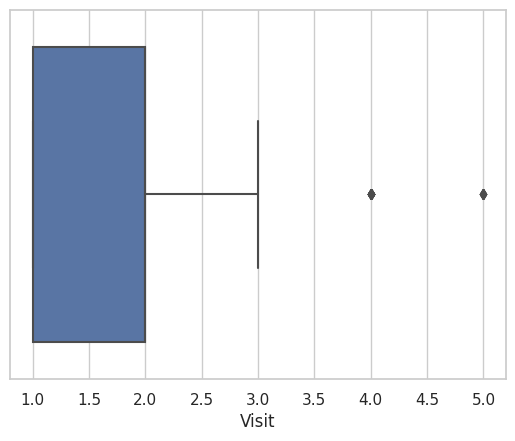

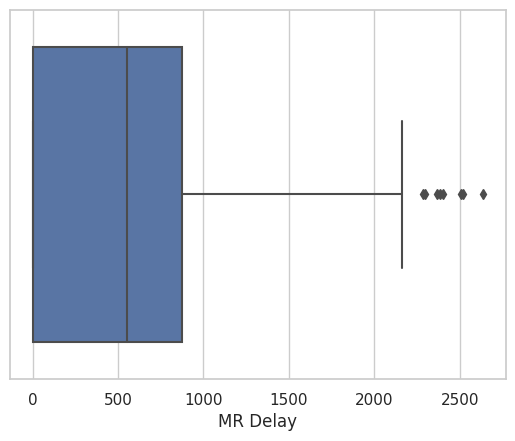

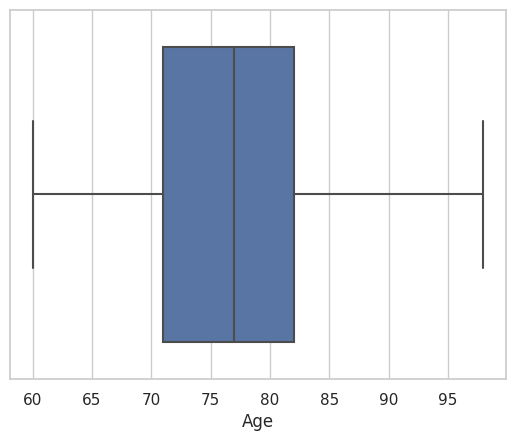

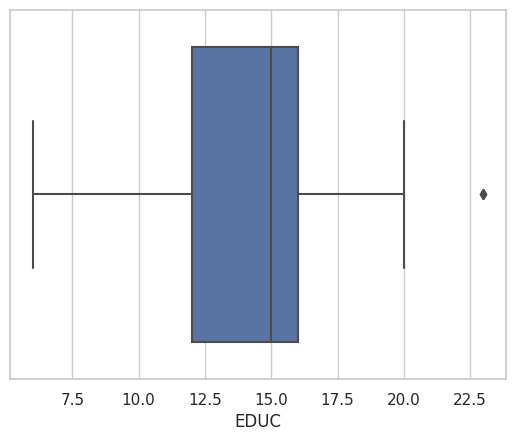

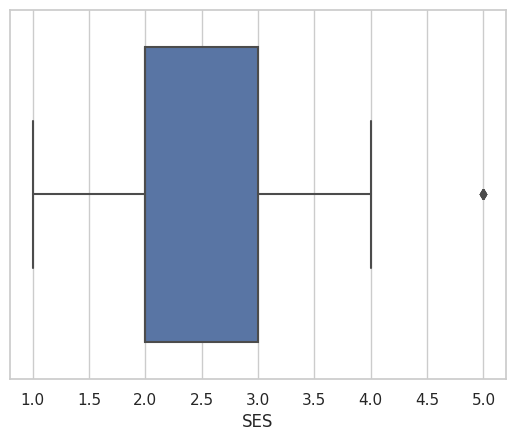

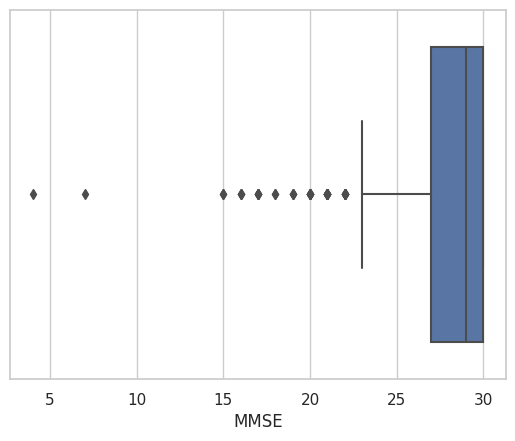

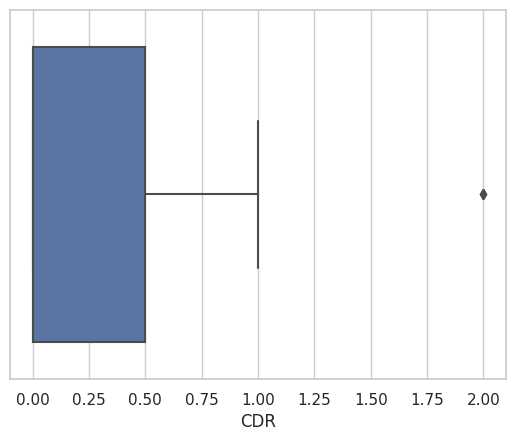

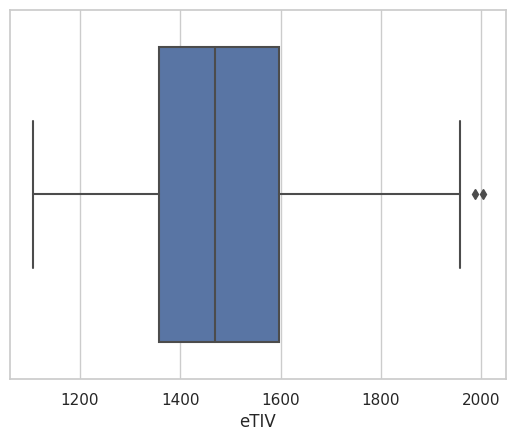

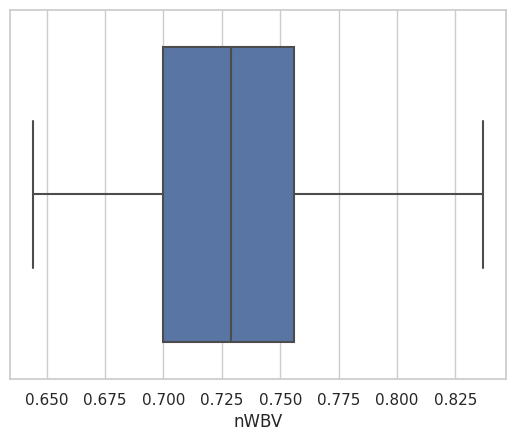

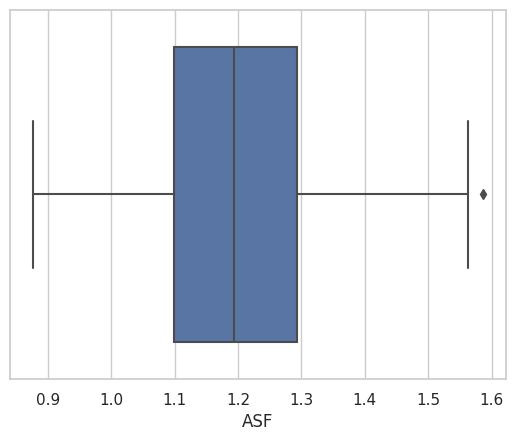

In [17]:
#check for outliers
for col in df.columns:

    if col != 'Group':
        datatype = df[col].dtype  #get column datatype
        if datatype == "int64" or datatype == "float64":
            sns.boxplot(data = df, x = col)
            plt.show()

In [18]:

#fill MMSE with mode and ses with mean
#df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mode()[0])
#df["SES"].fillna(df["SES"].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


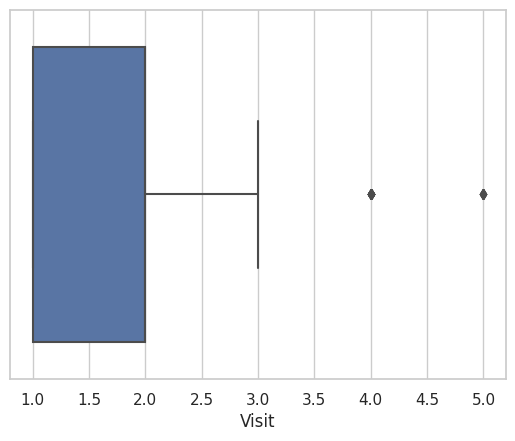

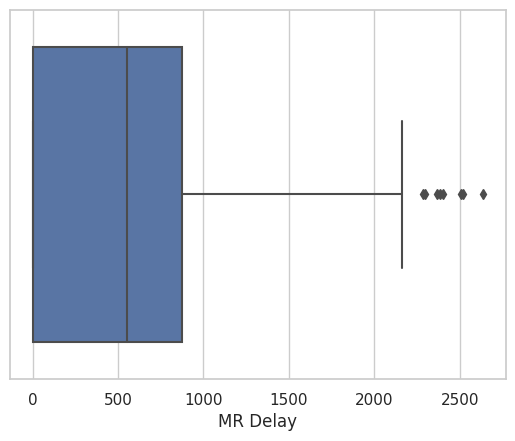

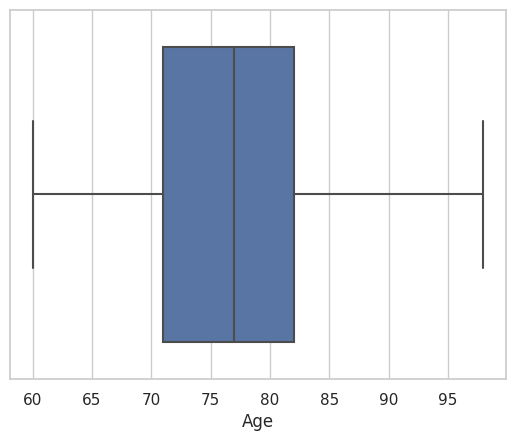

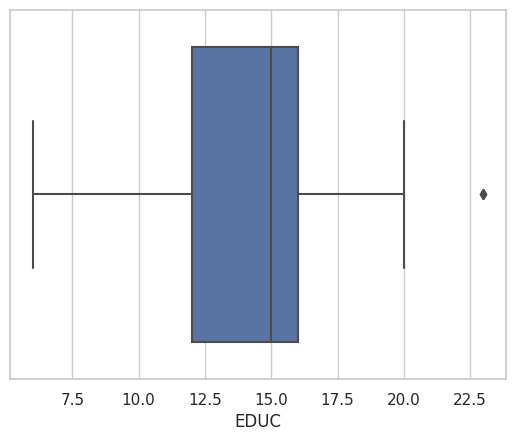

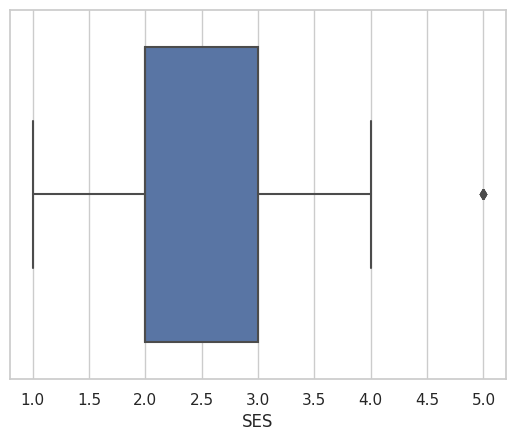

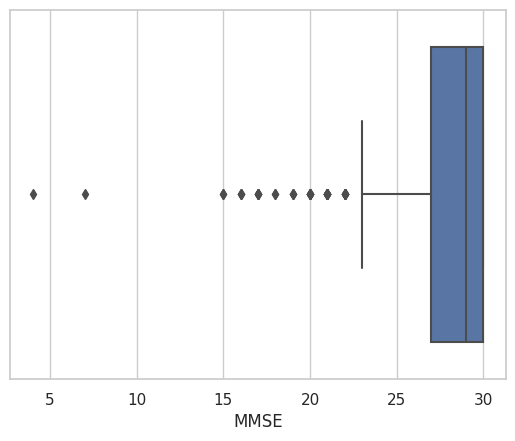

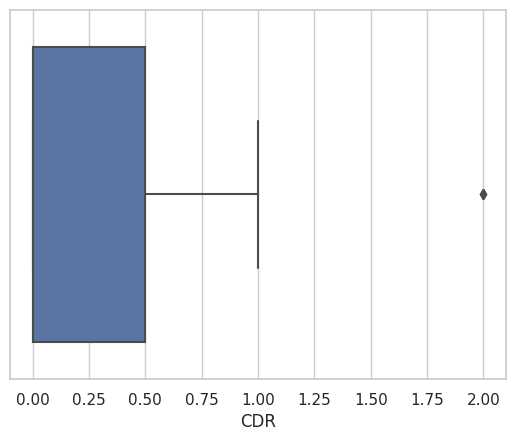

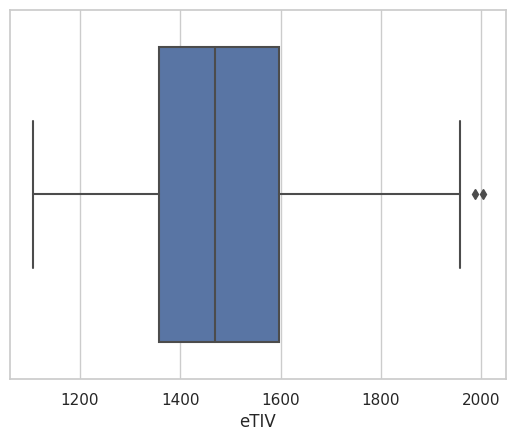

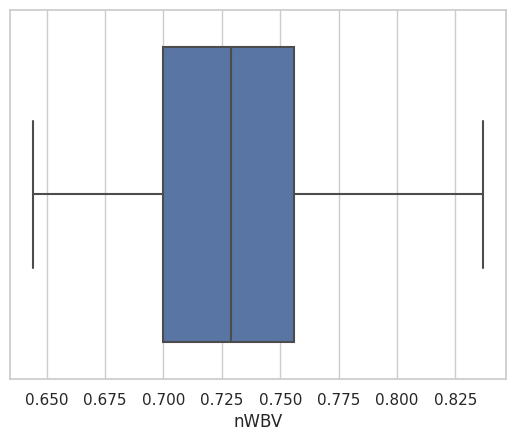

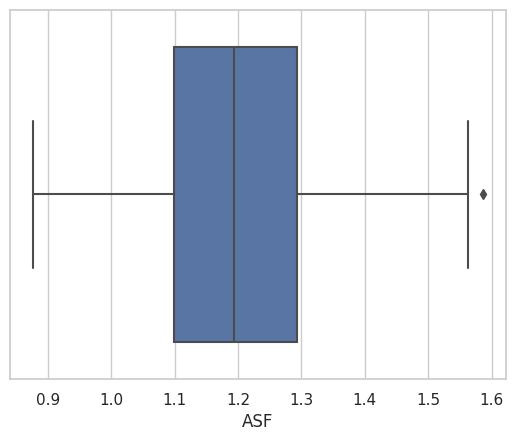

In [19]:
#verify that distribution is kept
#check for outliers
for col in df.columns:

    if col != 'Group':
        datatype = df[col].dtype  #get column datatype
        if datatype == "int64" or datatype == "float64":
            sns.boxplot(data = df, x = col)
            plt.show()

### Data Preparation

#### Formatting data

In [20]:
#Moving thhe diagnosis feature which is the label variable to the last position in the dataframe
labels = df.pop('Group')
df['Group'] = labels
df

,Subject ID,MRI ID,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,OAS2_0001,OAS2_0001_MR1,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,OAS2_0001_MR2,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876,Nondemented
2,OAS2_0002,OAS2_0002_MR1,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046,Demented
3,OAS2_0002,OAS2_0002_MR2,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010,Demented
4,OAS2_0002,OAS2_0002_MR3,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034,Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037,Demented
369,OAS2_0185,OAS2_0185_MR3,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040,Demented
370,OAS2_0186,OAS2_0186_MR1,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331,Nondemented
371,OAS2_0186,OAS2_0186_MR2,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323,Nondemented


#### Data cleaning

In [21]:
#removal of insignificant features in the dataset
#feature selection will continue after data construction
#Subject ID MRI ID
df.pop("Subject ID")
df.pop('MRI ID')
df

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883,Nondemented
1,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876,Nondemented
2,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046,Demented
3,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010,Demented
4,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034,Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037,Demented
369,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040,Demented
370,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331,Nondemented
371,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323,Nondemented


In [22]:
#detect outliers
#check for outliers
nl = []
for col in df.columns:

    if col != 'Group':
        datatype = df[col].dtype  #get column datatype
        if datatype == "int64" or datatype == "float64":
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            #print(IQR)
            upper_lim = Q1 + 1.5 * IQR
            lower_lim = Q3 - 1.5 * IQR

            outlier_low = (df[col] < lower_lim)
            outlier_high = (df[col] > upper_lim)

            nl.append(len(df[col]) - ((len(df[col][outlier_low])) - (len(df[col][outlier_low]))))

            #df[col] = df[col].ewm(alpha=0.2).mean()

print(max(nl))

#Removal of detected outliers would lead to massive lost of data

373


#### Data Construction

In [23]:
#Encode diagnosis using label encoder
#df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df['Group'].replace(to_replace='Nondemented', value = 1, inplace=True)
df['Group'].replace(to_replace='Demented', value = 0, inplace=True)
df['Group'].replace(to_replace='Converted', value = 2, inplace=True)
df

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1
1,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876,1
2,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0
3,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010,0
4,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037,0
369,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040,0
370,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331,1
371,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323,1


In [24]:
print(list(df["M/F"].unique()))
print(list(df["Hand"].unique()))

['M', 'F']
['R']


In [25]:
df['M/F'].replace(to_replace='M', value = 0, inplace=True)
df['M/F'].replace(to_replace='F', value = 1, inplace=True)
df['Hand'].replace(to_replace='R', value = 0, inplace=True)
df

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1
1,2,457,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876,1
2,1,0,0,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0
3,2,560,0,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010,0
4,3,1895,0,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,0,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037,0
369,3,2297,0,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040,0
370,1,0,1,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331,1
371,2,763,1,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323,1


In [26]:
#feature selection: would be provided as an option to use after training
#Feature selection using feature Variance which reduced features
def feat_sel(df, thresh):
    s_df = df.copy()
    labels = df['Group'].tolist()
    selector = VarianceThreshold(threshold=thresh) #using a threshold of 90 percent
    Var = selector.fit_transform(s_df)

    sel_df = s_df[s_df.columns[selector.get_support(indices=True)]]
    #print(list(sel_df.columns))
    if 'Group' not in list(sel_df.columns):
        sel_df['Group'] = labels

    return sel_df

In [27]:
print("It is not advisable to perform feature selection, because upon experimentation, it was discovered that all feature\
were important for an efficient model")
print()
while True:
    ans = input("Would you like to perform feature selecion? y(es) or n(o) ")
    if ans.lower() == 'yes' or ans.lower() == 'y':
        thres = int(input("What percentage of variance would you like to inplement? Answer must be between 0 - 100  "))
        if thres >= 0 and thres <= 100:
            thresh = round((thres / 100), 2)
            #print(thresh)
            sdf = feat_sel(df, thresh)
            display(sdf)
            break
    elif ans.lower() == 'no' or ans.lower() == 'n':
        break

It is not advisable to perform feature selection, because upon experimentation, it was discovered that all featurewere important for an efficient model

Would you like to perform feature selecion? y(es) or n(o) n


In [177]:
#splitting and scaling the independent features
leng = len(df.columns) - 1
X = df.iloc[:,0:leng]
y = df.iloc[:,leng]

x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state = 2020, stratify=y)

In [29]:


#scaling
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

### Modelling

- Logistic regression as a baseline model

In [30]:
model = LogisticRegression(random_state=None, max_iter=400, solver='liblinear')   #newton-cg, 400  liblinear
result = model.fit(x_train, y_train)
#result.summary2()

In [31]:
eval_ = (model.score(x_test, y_test))
preds = result.predict(x_test)
#auc = roc_auc_score(y_test, preds)
print(eval_)

0.9066666666666666


In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.88      1.00      0.94        38
           2       1.00      0.12      0.22         8

    accuracy                           0.91        75
   macro avg       0.94      0.71      0.71        75
weighted avg       0.92      0.91      0.87        75



In [33]:
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[29  0  0]
 [ 0 38  0]
 [ 2  5  1]]


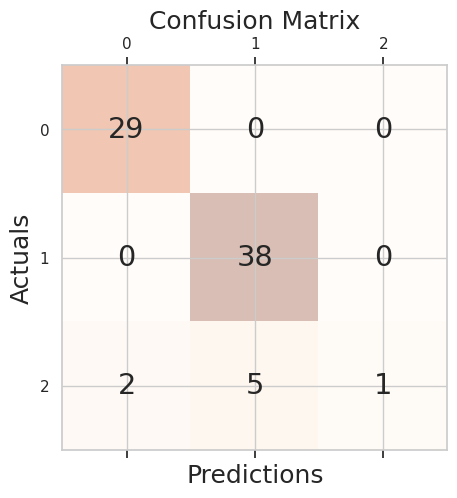

In [34]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(f1_score(y_test,preds, average="weighted"))

0.8728724279835391


In [ ]:
print(f1_score(y_test, preds, average="macro"))
print(precision_score(y_test, preds, average="macro"))
print(recall_score(y_test, preds, average="macro"))

0.7090534979423868
0.9397349337334333
0.7083333333333334


##### Hyperparameter optimization using kfold cross validation

In [ ]:
#logistic regression
lr_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j+2, random_state=0, shuffle=True)
    model = LogisticRegression(random_state=None, max_iter=400, solver='liblinear')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of Logistic regression with {j+2} number of splits: %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    lr_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating logistic regression is {round(max(lr_acc_list), 2)}")

Accuracy of Logistic regression with 2 number of splits: 89.548% (1.312%)
Accuracy of Logistic regression with 3 number of splits: 89.548% (1.713%)
Accuracy of Logistic regression with 4 number of splits: 90.620% (0.849%)
Accuracy of Logistic regression with 5 number of splits: 90.613% (2.811%)
Accuracy of Logistic regression with 6 number of splits: 90.621% (1.929%)
Accuracy of Logistic regression with 7 number of splits: 90.356% (3.524%)
Accuracy of Logistic regression with 8 number of splits: 90.894% (3.787%)
Accuracy of Logistic regression with 9 number of splits: 90.896% (2.716%)
Accuracy of Logistic regression with 10 number of splits: 90.882% (5.566%)
Accuracy of Logistic regression with 11 number of splits: 90.885% (3.855%)
Accuracy of Logistic regression with 12 number of splits: 90.894% (4.100%)
Accuracy of Logistic regression with 13 number of splits: 90.631% (4.955%)
Accuracy of Logistic regression with 14 number of splits: 90.629% (5.460%)
Accuracy of Logistic regression w

In [ ]:
#K Nearest neighbours
knn_acc_list = []
for j in range(15):
    n_neigh = random.randint(3, 10)
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of KNN with {j+2} number of splits and {n_neigh}  number of neighbours: %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    knn_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating KNN is {round(max(knn_acc_list), 2)}")

Accuracy of KNN with 2 number of splits and 3  number of neighbours: 50.942% (1.209%)
Accuracy of KNN with 3 number of splits and 9  number of neighbours: 52.542% (1.470%)
Accuracy of KNN with 4 number of splits and 8  number of neighbours: 50.666% (1.794%)
Accuracy of KNN with 5 number of splits and 6  number of neighbours: 51.204% (3.250%)
Accuracy of KNN with 6 number of splits and 6  number of neighbours: 53.627% (5.774%)
Accuracy of KNN with 7 number of splits and 5  number of neighbours: 54.692% (6.118%)
Accuracy of KNN with 8 number of splits and 7  number of neighbours: 52.035% (7.956%)
Accuracy of KNN with 9 number of splits and 7  number of neighbours: 55.478% (5.781%)
Accuracy of KNN with 10 number of splits and 9  number of neighbours: 52.788% (9.484%)
Accuracy of KNN with 11 number of splits and 9  number of neighbours: 53.638% (9.223%)
Accuracy of KNN with 12 number of splits and 4  number of neighbours: 53.915% (7.613%)
Accuracy of KNN with 13 number of splits and 9  num

In [ ]:
#Naive Bayes
nb_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = GaussianNB()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy Naive Bayes with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    nb_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating naive bayes is {round(max(nb_acc_list), 2)}")

Accuracy Naive Bayes with 2 number of splits : 90.888% (1.048%)
Accuracy Naive Bayes with 3 number of splits : 90.882% (2.750%)
Accuracy Naive Bayes with 4 number of splits : 90.614% (2.074%)
Accuracy Naive Bayes with 5 number of splits : 90.079% (1.826%)
Accuracy Naive Bayes with 6 number of splits : 90.613% (2.868%)
Accuracy Naive Bayes with 7 number of splits : 90.881% (4.675%)
Accuracy Naive Bayes with 8 number of splits : 91.171% (3.238%)
Accuracy Naive Bayes with 9 number of splits : 90.896% (3.897%)
Accuracy Naive Bayes with 10 number of splits : 90.875% (5.303%)
Accuracy Naive Bayes with 11 number of splits : 90.893% (5.522%)
Accuracy Naive Bayes with 12 number of splits : 90.894% (4.692%)
Accuracy Naive Bayes with 13 number of splits : 90.925% (5.310%)
Accuracy Naive Bayes with 14 number of splits : 90.924% (5.376%)
Accuracy Naive Bayes with 15 number of splits : 90.911% (5.725%)
Accuracy Naive Bayes with 16 number of splits : 90.614% (5.350%)
The best score in cross validatin

In [ ]:
#SVM
svm_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = SVC(kernel='linear')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of SVM with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    svm_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating SVM is {round(max(svm_acc_list), 2)}")

Accuracy of SVM with 2 number of splits : 91.153% (0.244%)
Accuracy of SVM with 3 number of splits : 92.497% (1.884%)
Accuracy of SVM with 4 number of splits : 90.886% (1.932%)
Accuracy of SVM with 5 number of splits : 91.416% (2.764%)
Accuracy of SVM with 6 number of splits : 90.340% (3.500%)
Accuracy of SVM with 7 number of splits : 91.145% (4.371%)
Accuracy of SVM with 8 number of splits : 90.900% (4.835%)
Accuracy of SVM with 9 number of splits : 91.431% (3.413%)
Accuracy of SVM with 10 number of splits : 90.875% (5.952%)
Accuracy of SVM with 11 number of splits : 90.893% (4.414%)
Accuracy of SVM with 12 number of splits : 91.154% (4.582%)
Accuracy of SVM with 13 number of splits : 91.711% (5.838%)
Accuracy of SVM with 14 number of splits : 91.707% (6.226%)
Accuracy of SVM with 15 number of splits : 91.722% (5.547%)
Accuracy of SVM with 16 number of splits : 91.429% (5.501%)
The best score in cross validating SVM is 92.5


In [ ]:
rf_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = RandomForestClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of Random Forest with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    rf_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating random forest is {round(max(rf_acc_list), 2)}")

Accuracy of Random Forest with 2 number of splits : 90.083% (0.778%)
Accuracy of Random Forest with 3 number of splits : 90.890% (1.980%)
Accuracy of Random Forest with 4 number of splits : 90.889% (1.164%)
Accuracy of Random Forest with 5 number of splits : 89.816% (1.787%)
Accuracy of Random Forest with 6 number of splits : 91.697% (2.502%)
Accuracy of Random Forest with 7 number of splits : 91.155% (2.969%)
Accuracy of Random Forest with 8 number of splits : 91.437% (3.814%)
Accuracy of Random Forest with 9 number of splits : 91.438% (2.993%)
Accuracy of Random Forest with 10 number of splits : 91.700% (4.869%)
Accuracy of Random Forest with 11 number of splits : 91.428% (4.591%)
Accuracy of Random Forest with 12 number of splits : 90.902% (4.060%)
Accuracy of Random Forest with 13 number of splits : 90.650% (4.735%)
Accuracy of Random Forest with 14 number of splits : 91.443% (4.358%)
Accuracy of Random Forest with 15 number of splits : 91.711% (5.343%)
Accuracy of Random Forest wi

In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = XGBClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of XGBoost with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    xgb_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating XGBoost is {round(max(xgb_acc_list), 2)}")

Accuracy of Random Forest with 2 number of splits : 89.812% (0.027%)
Accuracy of Random Forest with 3 number of splits : 89.551% (2.339%)
Accuracy of Random Forest with 4 number of splits : 89.279% (1.996%)
Accuracy of Random Forest with 5 number of splits : 90.357% (1.511%)
Accuracy of Random Forest with 6 number of splits : 89.546% (2.900%)
Accuracy of Random Forest with 7 number of splits : 91.150% (2.807%)
Accuracy of Random Forest with 8 number of splits : 91.437% (3.662%)
Accuracy of Random Forest with 9 number of splits : 90.631% (3.277%)
Accuracy of Random Forest with 10 number of splits : 90.875% (4.872%)
Accuracy of Random Forest with 11 number of splits : 90.358% (3.551%)
Accuracy of Random Forest with 12 number of splits : 91.154% (3.510%)
Accuracy of Random Forest with 13 number of splits : 90.394% (4.485%)
Accuracy of Random Forest with 14 number of splits : 91.443% (4.127%)
Accuracy of Random Forest with 15 number of splits : 90.644% (5.176%)
Accuracy of Random Forest wi

In [ ]:
#lightgbm
import lightgbm as lgb

lgb_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = lgb.LGBMClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of LightGBM with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    lgb_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating Light GBM is {round(max(lgb_acc_list), 2)}")

Accuracy of Random Forest with 2 number of splits : 88.198% (2.176%)
Accuracy of Random Forest with 3 number of splits : 89.548% (1.713%)
Accuracy of Random Forest with 4 number of splits : 89.816% (1.582%)
Accuracy of Random Forest with 5 number of splits : 89.820% (1.311%)
Accuracy of Random Forest with 6 number of splits : 90.886% (1.776%)
Accuracy of Random Forest with 7 number of splits : 90.611% (3.357%)
Accuracy of Random Forest with 8 number of splits : 91.177% (4.412%)
Accuracy of Random Forest with 9 number of splits : 90.896% (2.939%)
Accuracy of Random Forest with 10 number of splits : 91.415% (3.973%)
Accuracy of Random Forest with 11 number of splits : 91.428% (4.045%)
Accuracy of Random Forest with 12 number of splits : 90.633% (4.396%)
Accuracy of Random Forest with 13 number of splits : 91.986% (4.130%)
Accuracy of Random Forest with 14 number of splits : 91.188% (5.219%)
Accuracy of Random Forest with 15 number of splits : 91.189% (5.494%)
Accuracy of Random Forest wi

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
#catboost

from catboost import CatBoostClassifier

cbc_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = CatBoostClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of CatBoost with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    cbc_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating CatBoost is {round(max(cbc_acc_list), 2)}")

Streaming output truncated to the last 5000 lines.
6:	learn: 0.7256611	total: 20.1ms	remaining: 2.85s
7:	learn: 0.6917601	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6587745	total: 25.6ms	remaining: 2.82s
9:	learn: 0.6328325	total: 28.4ms	remaining: 2.81s
10:	learn: 0.5996133	total: 29.4ms	remaining: 2.64s
11:	learn: 0.5735272	total: 32.3ms	remaining: 2.66s
12:	learn: 0.5512499	total: 35ms	remaining: 2.66s
13:	learn: 0.5301320	total: 37.8ms	remaining: 2.66s
14:	learn: 0.5115845	total: 40.7ms	remaining: 2.67s
15:	learn: 0.4944719	total: 43.5ms	remaining: 2.68s
16:	learn: 0.4768337	total: 46.3ms	remaining: 2.68s
17:	learn: 0.4636761	total: 50.6ms	remaining: 2.76s
18:	learn: 0.4508650	total: 55.6ms	remaining: 2.87s
19:	learn: 0.4388317	total: 60.5ms	remaining: 2.96s
20:	learn: 0.4275276	total: 63.3ms	remaining: 2.95s
21:	learn: 0.4160891	total: 66.1ms	remaining: 2.94s
22:	learn: 0.4068355	total: 68.9ms	remaining: 2.93s
23:	learn: 0.3965535	total: 71.6ms	remaining: 2.91s
24:	learn: 0.388012

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

abc_acc_list = []
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = AdaBoostClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of AdaBoost with {j+2} number of splits : %.3f%% (%.3f%%)" %
          (results.mean()*100.0, results.std()*100.0))
    abc_acc_list.append(results.mean()*100.0)

print(f"The best score in cross validating AdaBoost is {round(max(abc_acc_list), 2)}")

Accuracy of AdaBoost with 2 number of splits : 67.620% (22.165%)
Accuracy of AdaBoost with 3 number of splits : 57.946% (13.726%)
Accuracy of AdaBoost with 4 number of splits : 62.517% (17.221%)
Accuracy of AdaBoost with 5 number of splits : 60.368% (9.449%)
Accuracy of AdaBoost with 6 number of splits : 66.206% (14.211%)
Accuracy of AdaBoost with 7 number of splits : 61.431% (13.833%)
Accuracy of AdaBoost with 8 number of splits : 64.096% (12.234%)
Accuracy of AdaBoost with 9 number of splits : 65.221% (12.765%)
Accuracy of AdaBoost with 10 number of splits : 65.192% (13.292%)
Accuracy of AdaBoost with 11 number of splits : 67.331% (11.325%)
Accuracy of AdaBoost with 12 number of splits : 68.347% (12.925%)
Accuracy of AdaBoost with 13 number of splits : 68.141% (11.353%)
Accuracy of AdaBoost with 14 number of splits : 64.683% (15.620%)
Accuracy of AdaBoost with 15 number of splits : 66.311% (15.274%)
Accuracy of AdaBoost with 16 number of splits : 68.422% (12.821%)
The best score in c

In [ ]:
cv_scores_names = ["linear regression", "knn", "naive bayes", "svm", "random forest", "xgboost", "lightgbm", "catboost", "adaboost"]
cv_scores_vals = [round(max(lr_acc_list), 2), round(max(knn_acc_list), 2), round(max(nb_acc_list), 2), round(max(svm_acc_list), 2),
                  round(max(rf_acc_list), 2), round(max(xgb_acc_list), 2), round(max(lgb_acc_list), 2), round(max(cbc_acc_list), 2),
                  round(max(abc_acc_list), 2)]

In [ ]:
cv_df = pd.DataFrame(list(zip(cv_scores_names, cv_scores_vals)), columns=["model", "scores"])
cv_df

In [ ]:
cv_df.to_csv(f"{data_path}/kaggle_cross_validation_scores_with_oversampled_data.csv", index=False)

In [ ]:
#model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
#model = GaussianNB()
#svclassifier = SVC(kernel='linear')
#RandomForestClassifier()

#### Assesment of model

- Assessing optimal model = Random Forest

In [36]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.075514,0.477249,0.850026,0.0,-1.979023,1.212398,-1.327769,0.704916,-0.777596,-0.529760,2.360184,0.462225
1,-0.996061,-0.973867,0.850026,0.0,-0.800834,1.212398,-1.327769,0.704916,-0.777596,-0.332293,0.052673,0.239580
2,-0.996061,-0.973867,0.850026,0.0,-0.539015,0.152883,1.433354,0.436859,-0.777596,-1.226699,-0.859599,1.345385
3,2.218664,2.393907,-1.176435,0.0,-0.539015,-0.906632,1.433354,0.168802,-0.777596,-0.227753,-0.188811,0.120836
4,-0.996061,-0.973867,0.850026,0.0,1.031903,1.212398,-1.327769,0.436859,-0.777596,-1.273161,-0.752273,1.404757
...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.996061,-0.973867,0.850026,0.0,-0.015375,-0.906632,1.433354,0.436859,-0.777596,-0.616877,0.133167,0.566127
294,0.075514,-0.343285,0.850026,0.0,1.555542,-0.906632,1.433354,-0.099255,-0.777596,-0.895653,0.106336,0.900094
295,-0.996061,-0.973867,-1.176435,0.0,-1.455383,0.152883,-0.407395,-0.635370,0.531577,0.376261,-0.054653,-0.480306
296,0.075514,1.195023,-1.176435,0.0,-0.539015,0.506055,-0.407395,0.436859,-0.777596,2.600659,-0.188811,-2.150145


In [178]:
from imblearn.over_sampling import SMOTE


#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y.ravel())
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train)

train_df =pd.concat([x_train, y_train], axis=1)
train_df


,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,2,932,1,0,62,18,1.000000,30.000000,0.000000,1392,0.817000,1.261000,1
1,1,0,1,0,71,18,1.000000,30.000000,0.000000,1426,0.731000,1.231000,1
2,1,0,1,0,73,15,4.000000,29.000000,0.000000,1272,0.697000,1.380000,1
3,4,2163,0,0,73,12,4.000000,28.000000,0.000000,1444,0.722000,1.215000,1
4,1,0,1,0,85,18,1.000000,29.000000,0.000000,1264,0.701000,1.388000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,4,2468,0,0,83,17,1.366570,29.816715,0.500000,1599,0.687695,1.108368,2
452,1,0,1,0,67,15,2.987305,30.000000,0.006348,1298,0.798429,1.351454,2
453,2,1334,1,0,74,15,1.121259,27.919160,0.500000,1322,0.761132,1.327401,2
454,2,462,1,0,88,12,2.209572,29.604786,0.000000,1426,0.716629,1.230809,2


<ipython-input-38-3fe32a87e98b>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')
<ipython-input-38-3fe32a87e98b>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name].value_counts())
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Group', ylabel='Density'>

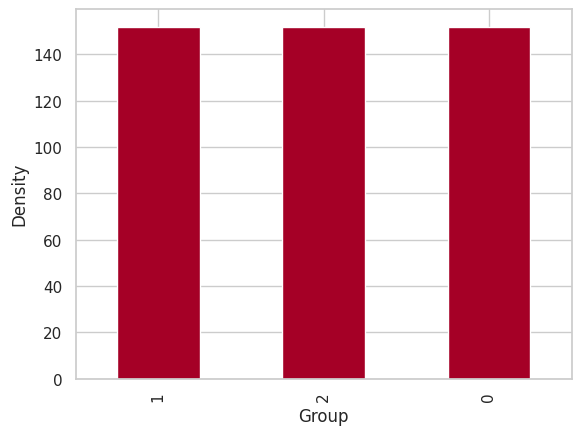

In [198]:
#plot bar chart for leabel variable = diagnosis
plot_dist(train_df, "Group", 'bar')

In [199]:
#splitting and scaling the independent features
#leng = len(df.columns) - 1
#X = df.iloc[:,0:leng]
#y = df.iloc[:,leng]

#x_train, x_test, y_train, y_test = train_test_split(X, y,
#test_size=0.2, random_state = 2020, stratify=y)

In [200]:
#load test data into dataframe
test_df = pd.concat([x_test, y_test], axis=1)
test_df

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
31,4,1861,0,0,85,12,3.0,30.0,0.0,1820,0.755,0.964,1
71,5,2369,1,0,75,13,4.0,29.0,0.0,1349,0.778,1.301,1
348,3,1631,0,0,89,16,2.0,30.0,0.5,1408,0.679,1.246,2
259,2,472,1,0,75,12,3.0,29.0,0.0,1338,0.747,1.312,1
344,2,700,0,0,72,16,4.0,28.0,0.5,1796,0.732,0.977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,0,0,0,73,18,2.0,29.0,0.0,1548,0.773,1.134,1
211,3,1752,1,0,82,11,4.0,30.0,0.0,1590,0.760,1.104,1
335,1,0,0,0,76,16,3.0,30.0,0.0,1832,0.769,0.958,1
41,1,0,1,0,61,16,3.0,30.0,0.0,1313,0.805,1.337,1


In [277]:
#save test df as excel file
test_df.to_csv(f"{data_path}/kaggle_test_data_3.csv", index =False)

In [202]:
rf_model = RandomForestClassifier()
result = rf_model.fit(x_train, y_train)


In [203]:
eval_ = rf_model.score(x_test, y_test)
preds = rf_model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.9333333333333333


In [204]:
#Hyperparameter optimization
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }




In [261]:
grid = GridSearchCV(rf_model, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid = grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [262]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score is: 0.9473684210526315


##### Retraining  random forest classsifier on optimized parameters


In [273]:
#rf_model = RandomForestClassifier(max_depth = None, max_features = 5, min_samples_leaf = 2,
#                                  min_samples_split = 2, n_estimators = 10)

#rf_model = RandomForestClassifier(max_depth = 10, max_features = 7, min_samples_leaf = 1,
 #                                 min_samples_split = 3, n_estimators = 100)

rf_model = RandomForestClassifier(max_depth = 10, max_features = 1, min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 100)#
#rf_model = RandomForestClassifier()
result = rf_model.fit(x_train, y_train)

insample_predictions = rf_model.predict(x_train)
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions,y_train)))
print()
print(classification_report(insample_predictions,y_train))

Insample Accuracy 100.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       152

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



In [274]:
eval_ = rf_model.score(x_test, y_test)
preds = rf_model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.92


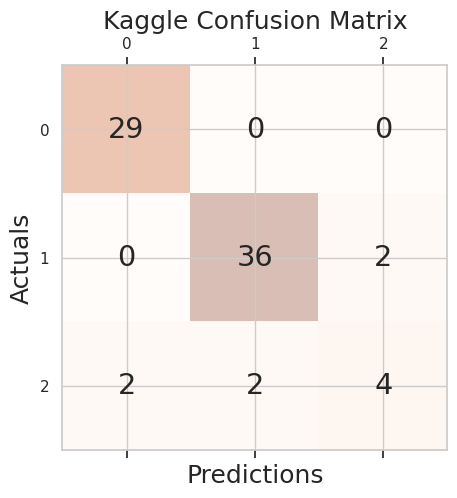

In [275]:
preds = result.predict(x_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Kaggle Confusion Matrix', fontsize=18)
plt.savefig(f"{data_path}/kaggle_confusion_matrix.png")
plt.show()

In [276]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Make predictions on the test set
y_pred = rf_model.predict_proba(x_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate the AUC scores for each class
auc_scores = roc_auc_score(y_test_bin, y_pred, multi_class='ovr')
print("AUC Scores:", auc_scores)

AUC Scores: 0.9561246769876351


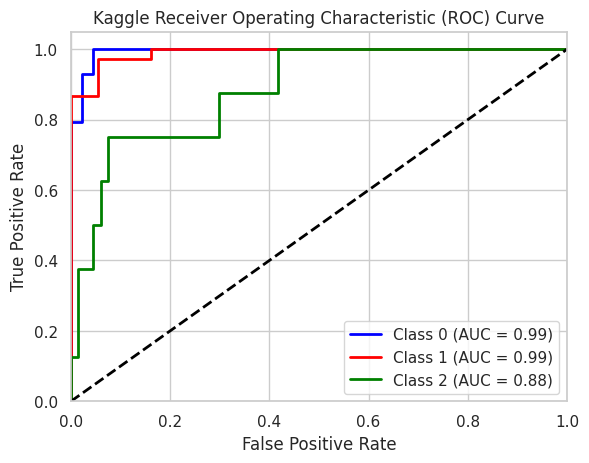

In [278]:
from itertools import cycle
# Make predictions on the test set
y_scores = rf_model.predict_proba(x_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=list(range(3)))  # Replace '3' with the actual number of classes

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Replace '3' with the actual number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['blue', 'red', 'green'])  # Change colors as per your preference
for i, color in zip(range(3), colors):  # Replace '3' with the actual number of classes
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kaggle Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(f"{data_path}/kaggle_ROC_curve.png")
plt.show()

In [279]:
#save model
import joblib
joblib.dump(rf_model, f"{data_path}/alzheimers_random_forest_92.joblib")

['/content/gdrive/MyDrive/Thesis/kaggle/tabular_classification/data/alzheimers_random_forest_92.joblib']

In [280]:
loaded_rf = joblib.load(f"{data_path}/alzheimers_random_forest_92.joblib")

In [281]:
eval_ = loaded_rf.score(x_test, y_test)
preds = loaded_rf.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.92


### Evaluation

In [282]:
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[29  0  0]
 [ 0 36  2]
 [ 2  2  4]]


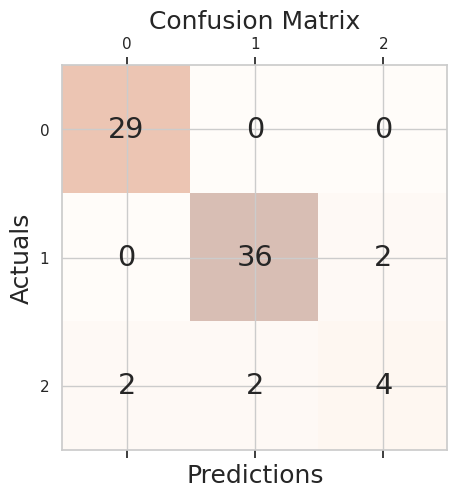

In [283]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [284]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.95      0.95      0.95        38
           2       0.67      0.50      0.57         8

    accuracy                           0.92        75
   macro avg       0.85      0.82      0.83        75
weighted avg       0.91      0.92      0.91        75



In [285]:
np.unique(preds)

array([0, 1, 2])

In [286]:
print(f"F1 Score is {f1_score(y_test, preds, average='micro')}")
print(f"Precision score is {precision_score(y_test, preds, average='micro')}")
print(f"Recall Score is {recall_score(y_test, preds, average='micro')}")
print(f"Accuracy Score is {accuracy_score(y_test, preds)}")

F1 Score is 0.92
Precision score is 0.92
Recall Score is 0.92
Accuracy Score is 0.92


#### These feature importances identifies the importance of features with respect to the model predictive accuracy

In [287]:
#Feature importance
importances = rf_model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

#feat_labels = df.columns[1:]
feat_labels = list(df.columns)
feat_labels.pop()
feat_labels = np.array(feat_labels)
feat_labels

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) CDR                            0.201458
 2) MMSE                           0.150539
 3) SES                            0.105718
 4) eTIV                           0.089026
 5) nWBV                           0.085156
 6) ASF                            0.082617
 7) MR Delay                       0.075882
 8) Age                            0.073535
 9) EDUC                           0.066963
10) Visit                          0.035666
11) M/F                            0.033440
12) Hand                           0.000000


In [ ]:
sorted_indices

array([ 8,  7,  6,  1, 11,  9, 10,  4,  5,  0,  2,  3])

In [ ]:
column_names = X.columns.tolist()
indices = np.argsort(importances)
importances_sorted = importances[indices]
column_names_sorted = [column_names[i] for i in indices]

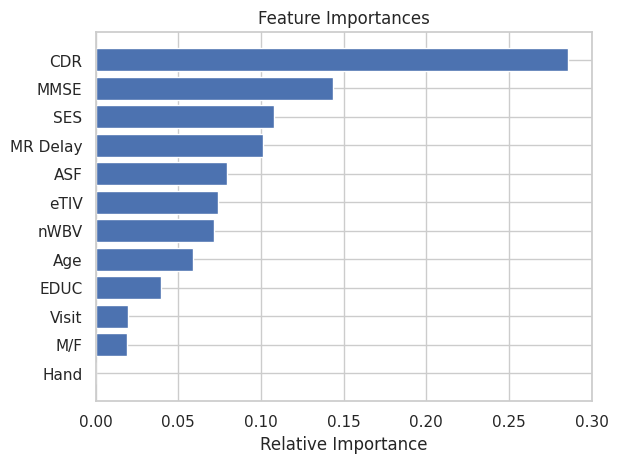

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(column_names_sorted)), importances_sorted, color='b', align='center')
plt.yticks(range(len(column_names_sorted)), column_names_sorted)
plt.xlabel('Relative Importance')
plt.savefig(f"{data_path}/kaggle_feature_importances.png")
plt.show()

In [ ]:
loaded_rf.feature_importances_

array([0.01948075, 0.10102594, 0.01889261, 0.        , 0.05874436,
       0.039682  , 0.10774779, 0.14377991, 0.28575947, 0.07381419,
       0.07144758, 0.07962538])

In [288]:
#3	1608	1	0	65	13	2.000000	30.0	0.0	1333	0.801	1.317	1
#np.array(my_list).reshape(-1, 1)     .reshape(-1, 1)
#scaler = StandardScaler()  #scaler.fit_transform(

#t_test = np.array([2, 486, 1, 0, 83, 18, 2.000000, 25.0, 0.5, 1179, 0.733, 1.488]).reshape(1, -1)
t_test = np.array([2, 762, 0, 0, 81, 19, 1.000000, 28.06, 0.5, 1605, 0.679, 1.050]).reshape(1, -1)
t_pred = loaded_rf.predict(t_test)
t_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
print(X.columns.tolist())

['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']


### Statistical testing on Random forest model

In [179]:
from sklearn.feature_selection import SelectKBest, f_classif

In [183]:
sel = SelectKBest(f_classif, k=5)
sel.fit(x_train, y_train)
scores = sel.scores_
columns = x_train.columns

for col, score in zip(columns, scores):
    print(f'Feature: {col}, Score: {score}')

Feature: Visit, Score: 3.3892983749254135
Feature: MR Delay, Score: 15.024630692582864
Feature: M/F, Score: 25.756908603906684
Feature: Hand, Score: nan
Feature: Age, Score: 4.163785091928285
Feature: EDUC, Score: 19.61506120851325
Feature: SES, Score: 35.93943986391283
Feature: MMSE, Score: 137.68984972054636
Feature: CDR, Score: 345.17806658018225
Feature: eTIV, Score: 2.9921887778829137
Feature: nWBV, Score: 22.10481055971551
Feature: ASF, Score: 2.0505489029482127


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


### Compute and plot f-value scores, the higher the score, the more important the feature is

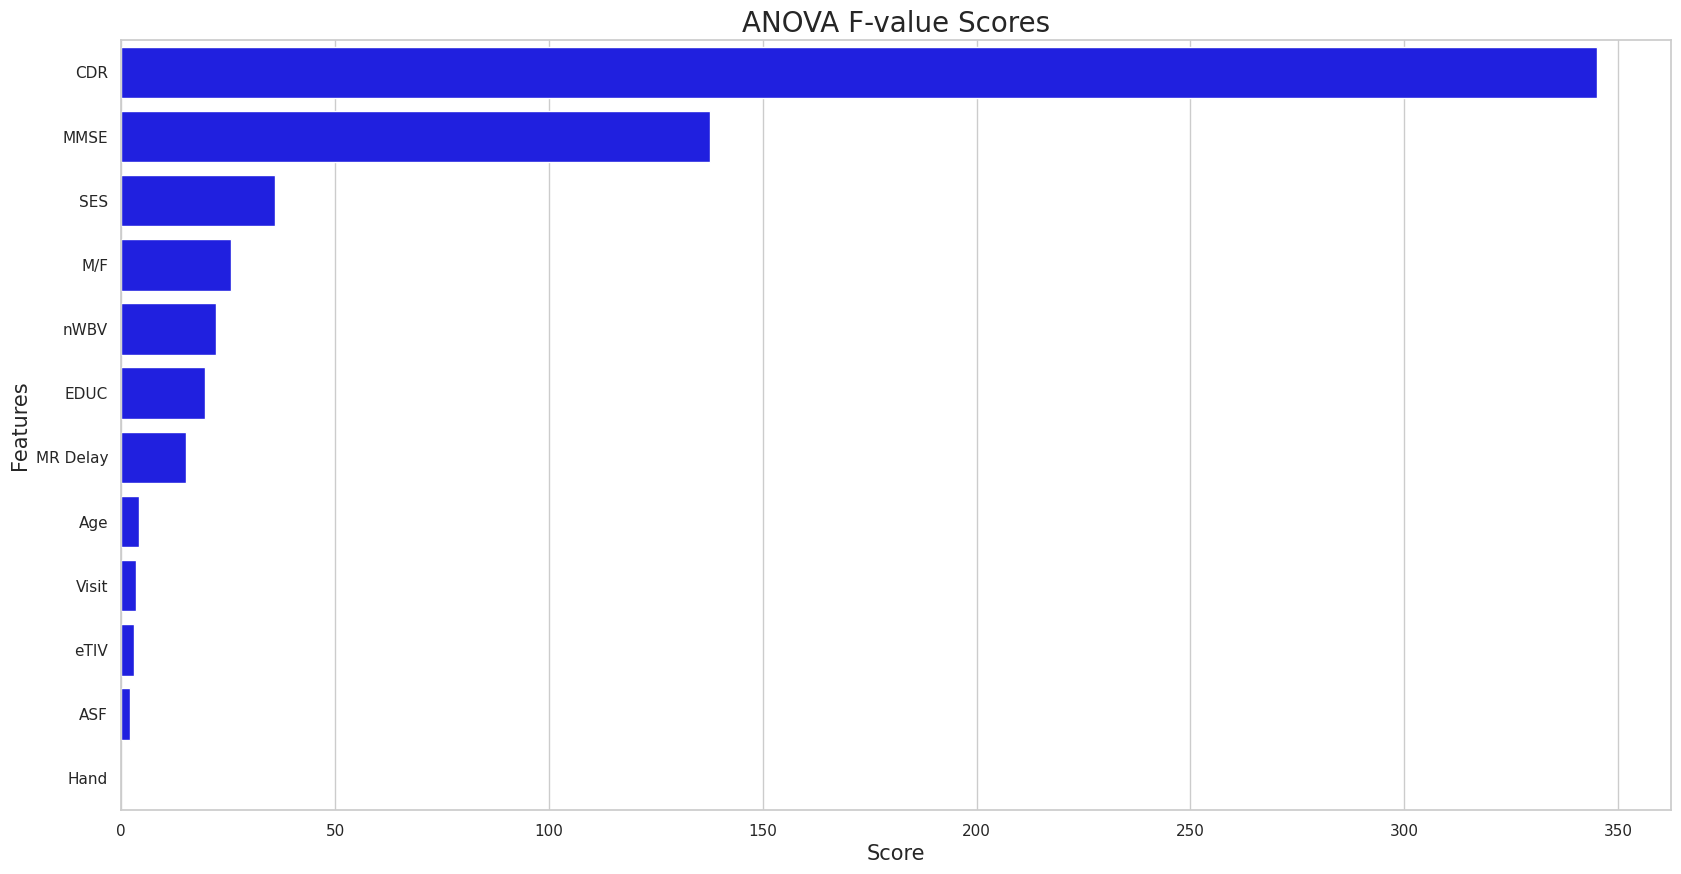

In [186]:
df_scores = pd.DataFrame({'Feature': columns, 'Score': scores})
df_scores = df_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='Score', y='Feature', data=df_scores, color='blue')
plt.title('ANOVA F-value Scores', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.savefig(f"{data_path}/f_values_plot.jpg")
plt.show()

### Compute and plot the p_values to identify columns with p_values lower than 0.05

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


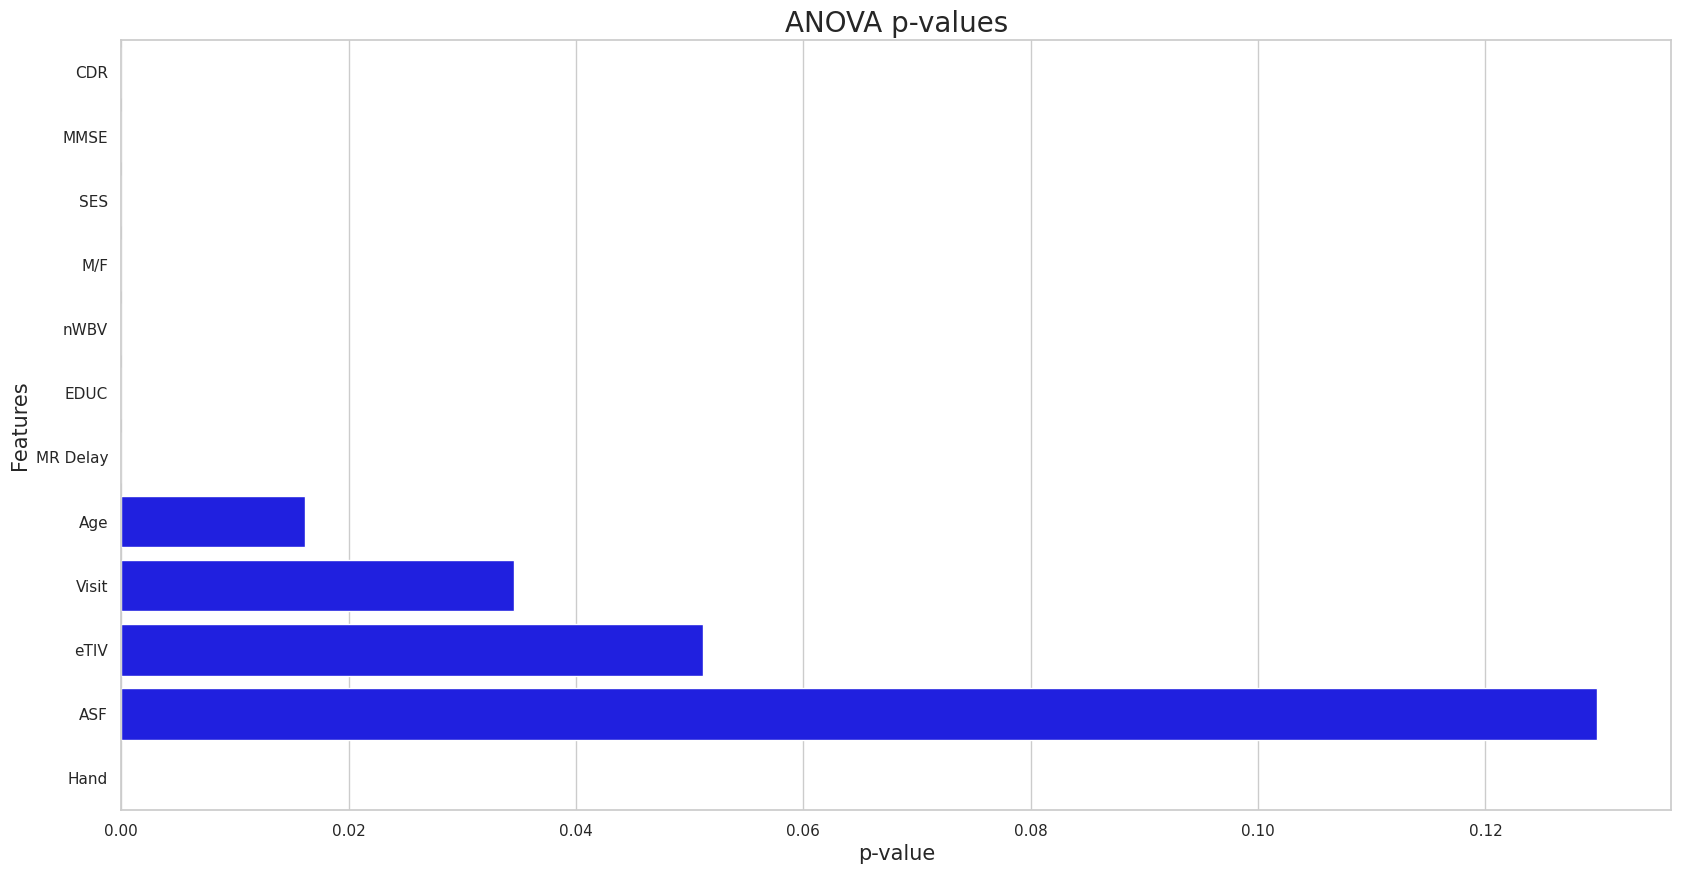

In [188]:
fvalues, pvalues = f_classif(x_train, y_train)
df_pvalues = pd.DataFrame({'Feature': columns, 'p-value': pvalues})
df_pvalues = df_pvalues.sort_values(by='p-value')

plt.figure(figsize=(20, 10))
sns.barplot(x='p-value', y='Feature', data=df_pvalues, color='blue')
plt.title('ANOVA p-values', fontsize=20)
plt.xlabel('p-value', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.savefig(f"{data_path}/p_values_plot.jpg")
plt.show()


In [190]:
pvalues[pvalues < 0.05]

array([3.45900169e-02, 4.81044869e-07, 2.54386213e-11, 1.61477267e-02,
       6.76313972e-09, 3.25729506e-15, 1.91510923e-47, 8.47475548e-92,
       6.91895693e-10])